### The problem statement

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style= 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df = pd.read_csv("F:\Randomfroest feature importance\income_evaluation.csv")

### Exploratory Data Analysis

In [3]:
# print the shape of the data
print(f"The shape of the dataset: {df.shape}")

The shape of the dataset: (32561, 15)


##### we can see there are 32561 instances and 15 attributes in the dataset

In [4]:
# preview the dataset
df.head(5)

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

# df.columns

In [6]:
# view summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings
##### - we can see that the dataset contains 9 character variables and 6 numerical variables.
##### - income is the target variable.
##### - There are no missing values in the dataset

In [7]:
# view statistical properties of the numerical properties in the dataset
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education_num   32561.0      10.080679       2.572720      1.0       9.0   
capital_gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital_loss    32561.0      87.303830     402.960219      0.0       0.0   
hours_per_week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education_num       10.0      12.0       16.0  
capital_gain         0.0       0.0    99999.0  
capital_loss         0.0       0.0     4356.0  
hours_per_week      40.0      45.0       99.0

In [8]:
# view statistical properties of the categorical properties in the dataset
df.describe(include='object')

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

In [9]:
# df.isnull().any()

In [10]:
# check for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Check with ASSERT statement

In [11]:
# Assert that there are no missing vaues in the dataframe

assert pd.notnull(df).all().all()

### Functional approach to  EDA

In [12]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame) :
        total_na = df.isnull().sum().sum()
        print("Dimensions : %d rows,%d columns" % (df.shape[0], df.shape[1]))
        print("Total NA values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
        
initial_eda(df)

Dimensions : 32561 rows,15 columns
Total NA values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64     

### Explore Categorial Variable


#### Find Categoricalvariables

In [13]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print(f"\nThere are {(len(categorical))} variables present in the dataset.")
print(f"\nThe categorical variables are :  \n\n {categorical}.")


There are 9 variables present in the dataset.

The categorical variables are :  

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'].


In [14]:
# preview categorical variables
df[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

#### Frequency distribution of categorical varibales

In [15]:
for var in categorical :
    print(df[var].value_counts(), "\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

In [16]:
### Percentage of Frequncy distribution of values :
for var in categorical:
    print((df[var].value_counts()/ np.float(len(df)))*100)

 Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 ?                    5.638647
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: workclass, dtype: float64
 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name: education, dtype: float64
 Married-civ-spouse       45.993673
 Never-married            32.809189
 Divorced                 13.645158
 Separated                 3.147938
 Widowed                   3.049661
 Married-spouse-absent     1.283744
 Married-

# Comment
- Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values.

- Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

- But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it does not consider ? as missing values.

- So, I have to replace ? with NaN so that Python can detect these missing values.

- I will explore these variables and replace ? with NaN.

### Explore the variables

#### Explore [income] target variable

In [17]:
# check formissing values 
print(df['income'].isnull().sum())
print(f"we can see that there are {df['income'].isnull().sum()} in the income (target) variable." )

# view number of unique values
print("\n",df['income'].nunique())
print(f"we can see that there are {df['income'].nunique()} unique values in the income (target) variable." )

# viwe the unique values
print("\n",df['income'].value_counts())

# view percentage of frequency distribution of values

print("\n",df['income'].value_counts()/len(df))


0
we can see that there are 0 in the income (target) variable.

 2
we can see that there are 2 unique values in the income (target) variable.

  <=50K    24720
 >50K      7841
Name: income, dtype: int64

  <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64


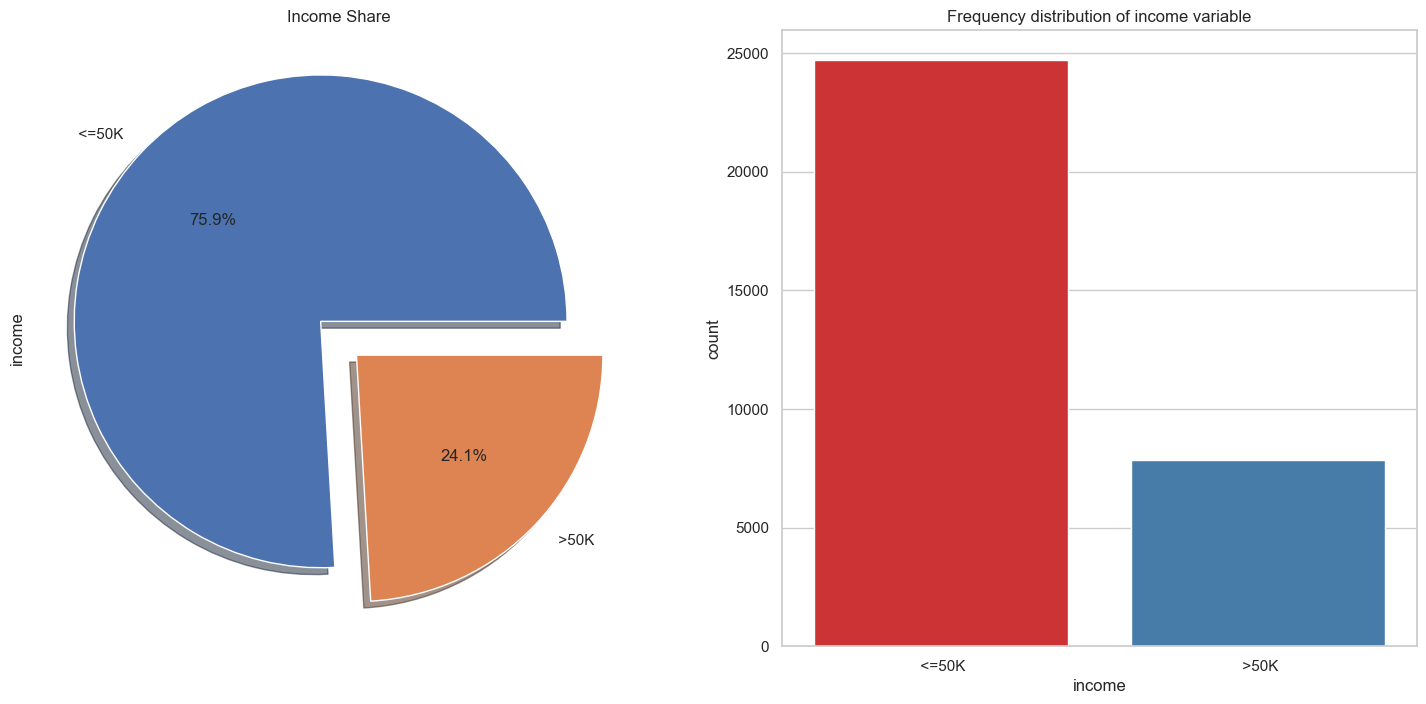

In [18]:
# visualize the frequency distribution of [income] variable
f,ax = plt.subplots(1,2, figsize =(18,8))

ax[0] = df['income'].value_counts().plot(kind = 'pie', explode = [0.1,0.1], ax = ax[0],autopct = "%1.1f%%",shadow =True)

ax[0].set_title('Income Share')

ax[1] = sns.countplot(x ='income', data = df, palette = 'Set1',ax = ax[1])
ax[1].set_title("Frequency distribution of income variable")

plt.show()

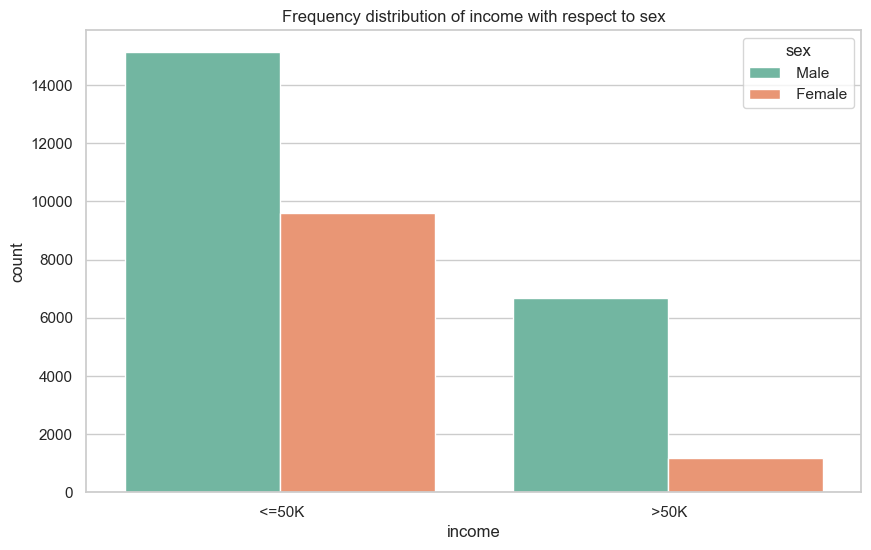

In [19]:
# Visualize [income] wrt [sex] variable
f,ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x ='income',hue ='sex', data = df, palette ='Set2')
ax.set_title("Frequency distribution of income with respect to sex")
plt.show()

Text(0.5, 1.0, 'Frequency distribution of Income wrt Race')

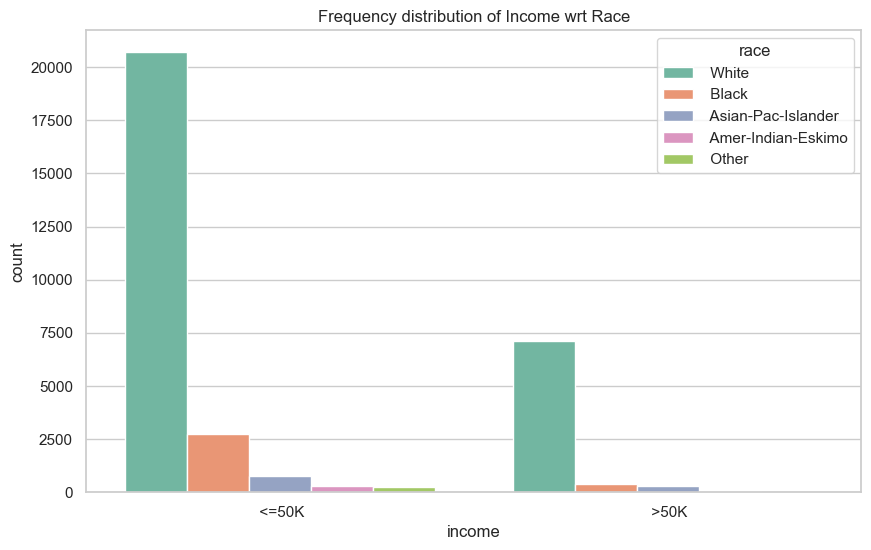

In [20]:
# visualize income wrt to race
f,ax = plt.subplots(figsize = (10,6))
sns.countplot(data = df, x = 'income', hue = 'race', palette ='Set2')
ax.set_title("Frequency distribution of Income wrt Race")

- We can see that whites make more money than non-whites in both the income categories.

#### Explore [workclass] variable

In [21]:
# check the number of unique labels 
print("Number of unique labels : ", df['workclass'].nunique())

# view the unique values
print("\nUnique values : ")

print("\n",df['workclass'].unique())


# view frequency distribution of values 
print("Frequency Distribution of Unique Values in [workclass] variable.")
print("\n", df['workclass'].value_counts())

Number of unique labels :  9

Unique values : 

 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Frequency Distribution of Unique Values in [workclass] variable.

  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


- We can see that there are 1836 values encoded as ? in workclass variable. I will replace these ? with NaN.

In [22]:
# replace '?' with NaN
df['workclass']= df['workclass'].replace(' ?', value = np.NaN)

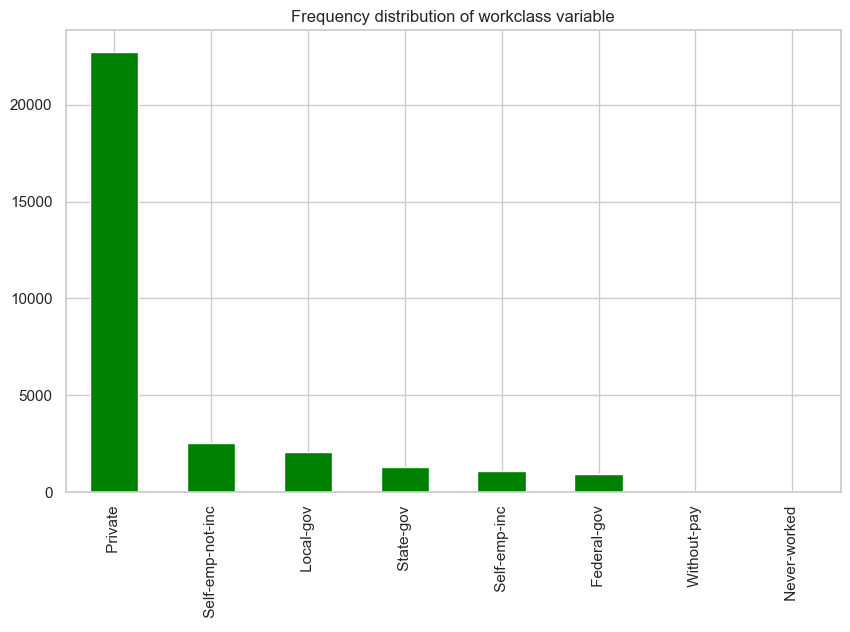

In [23]:
# visualize workclas variable
f,ax = plt.subplots(figsize = (10,6))
ax = df['workclass'].value_counts().plot(kind = 'bar',color = 'green')
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df['workclass'].value_counts().index, rotation = 90)
plt.show()

- we can see that there are lot more private workers than other category of workers

#### Visualize -workclass- variable with respect to income variable

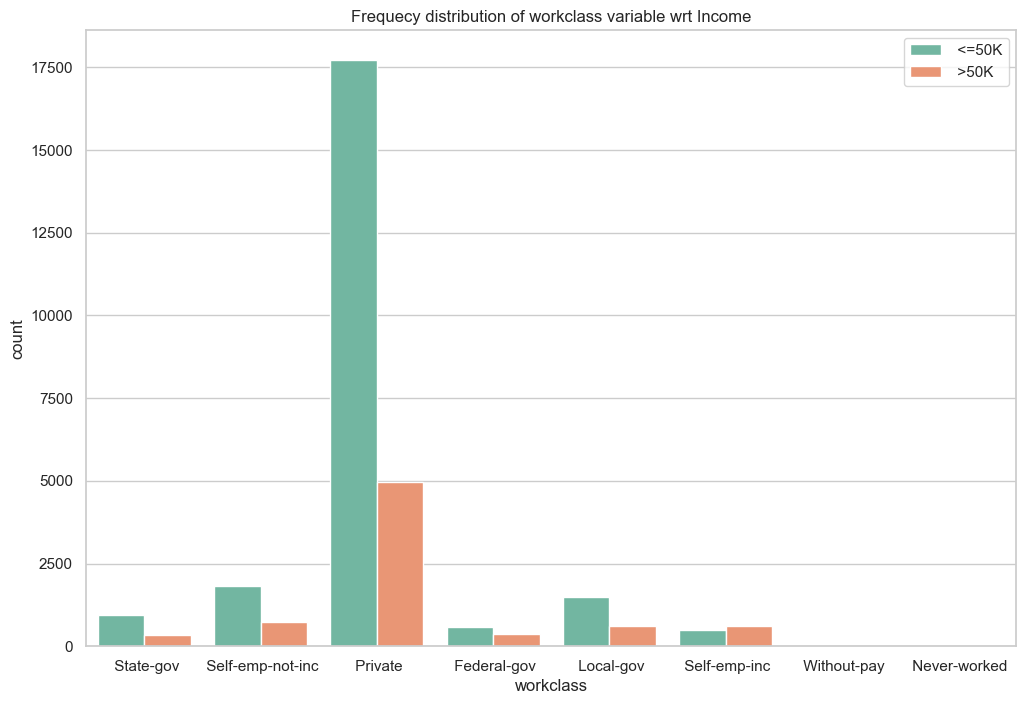

In [24]:
f, ax = plt.subplots(figsize = (12,8))
ax = sns.countplot(x ='workclass',hue = 'income', data = df,palette = 'Set2')
ax.set_title("Frequecy distribution of workclass variable wrt Income")
ax.legend(loc = "upper right")
plt.show()


- we can see that workers make less than or equal to 50k in most of the working categories.
- But the trend is more appealing in Private Workclass Category.

#### Visualize workclass variable wrt sex variable

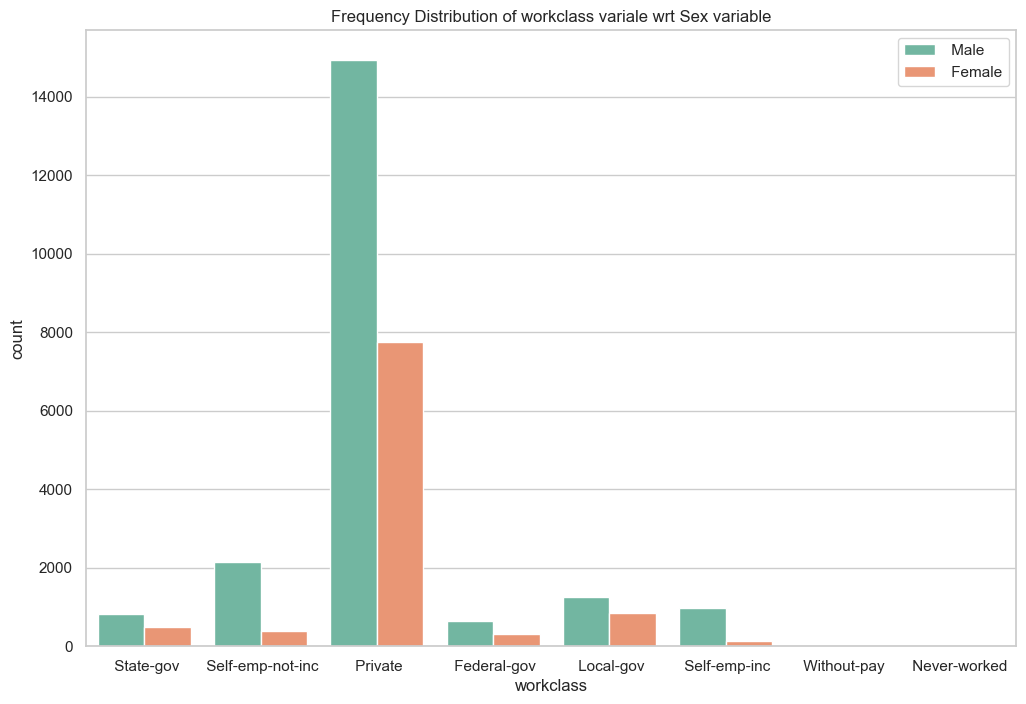

In [25]:
f, ax = plt.subplots(figsize = (12,8))
ax =sns.countplot(data = df, x = 'workclass', hue = 'sex', palette ='Set2')
ax.set_title("Frequency Distribution of workclass variale wrt Sex variable")
ax.legend(loc ='upper right')
plt.show()

- we can see that there are more male workers than the feamle workers in all the working  categories
- The trend is more appealing in Private sector..

#### Explore Occupation variable

In [26]:
# number of unique values
print(f"The variable occuaption contains {df['occupation'].nunique()} unique values")

# view unique labels
print(f"\nFollowing are the unique labels in the category occuaption: \n", f" \n{df['occupation'].unique()}",)

# view the distribution of unique values 
print(f"\n{df['occupation'].value_counts()}")

The variable occuaption contains 15 unique values

Following are the unique labels in the category occuaption: 
  
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [27]:
# replace '?' with np.nan
df['occupation'].replace(' ?', np.NaN, inplace = True)

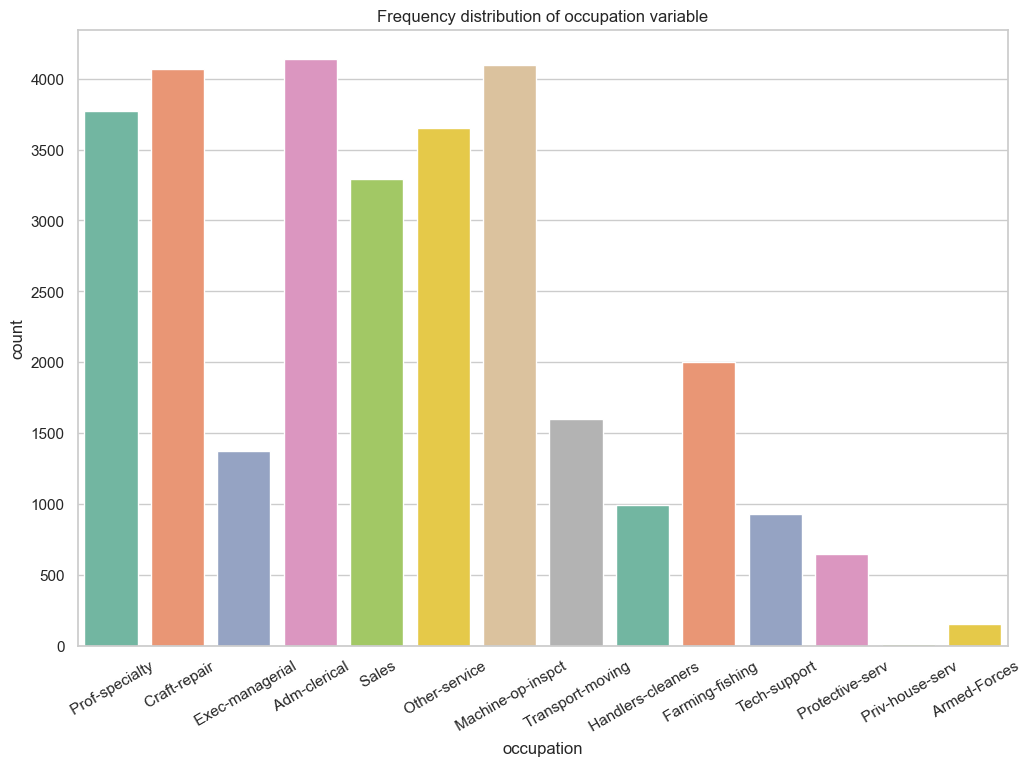

In [28]:
# visualze the frequency distribution of occupation variable

f,ax = plt.subplots(figsize = (12,8))
ax = sns.countplot(data = df, x = 'occupation', palette = 'Set2' )
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df['occupation'].value_counts().index, rotation = 30)
plt.show()

#### Explore native_country variable

In [29]:
# number of unique labels
print(f"Total number of unique labels in native_country variable : {df['native_country'].nunique()} \n")

# unique labels 
print(f"Unique labels in category native_country : \n{df['native_country'].unique()}")

# Freuqency distribution of native_country
print(f"\nFrequency Distribution of variable [native_country]: \n\n{df['native_country'].value_counts().sort_values(ascending =False)}")


Total number of unique labels in native_country variable : 42 

Unique labels in category native_country : 
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']

Frequency Distribution of variable [native_country]: 

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                      

In [30]:
# replace ? with np.NaN
df['native_country'].replace( ' ?', np.NaN,inplace = True)

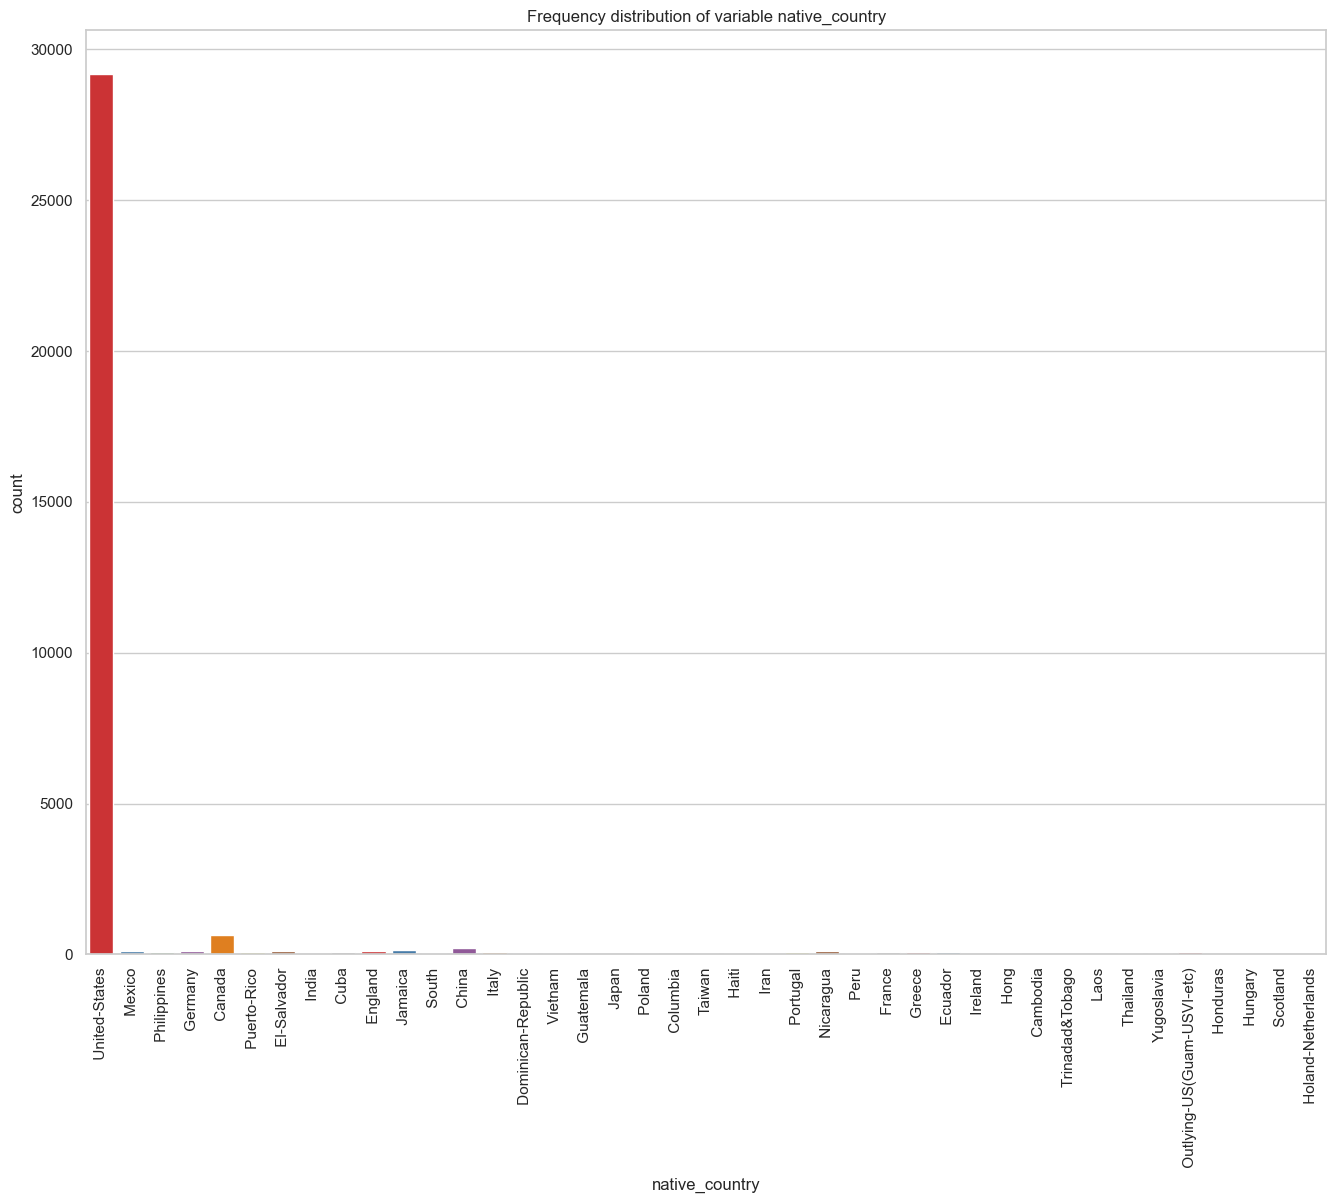

In [31]:
# Visualize frequency distribution of native_country variable
f,ax = plt.subplots(figsize = (16,12))
ax = sns.countplot(data= df, x = 'native_country', palette ='Set1')
ax.set_title('Frequency distribution of variable native_country')
ax.set_xticklabels(df['native_country'].value_counts().index, rotation = 90)
plt.show()

- We can see that United-States dominates amongst the native_country variables.

### Check missing values in categorical variables

In [32]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

- Now,we can see that variables 'workclass', 'occupation','native_country' contain missing values

### Number of Labels : Cardinality

- The number of labels within a categorical variables is knon as cardinality.
- A high number of labels within a variable is know as high cardinality.
- High cardinality may pose some serious problems im machine learning model. So,I will check for high cardinality.

In [33]:
# check for cardinality in categorical variable
for var in categorical:
    print(var, 'contains', len(df[var].unique()) , 'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


we can see that native_country column relatively contains large number of labels as compared to other columns.

# Explore Numerical Variables

####  Find numerical variables

In [34]:
numerical =[var for var in df.columns if df[var].dtype != 'O']
print(f"\nThere are {len(numerical)} numerical variables are available in the given dataset.")
print(f"\nThe numerical variables are : \n\n{numerical}")


There are 6 numerical variables are available in the given dataset.

The numerical variables are : 

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [35]:
# preview the numerical variables :
df[numerical].head(5)

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

### Summary of numerical variables


- There are 6 numerical variables.

- These are given by age, fnlwgt, education_num,capital_gain, capital_loss and hours_per_week.

- All of the numerical variables are of discrete data type.

#### Check missing values in numerical variables

In [36]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

- we can see that there ar no missing values in numerical variables of the given dataset.

### Explore numerical variables

#### Explore age variables

In [37]:
df['age'].nunique()

73

### view the distribution of age variable

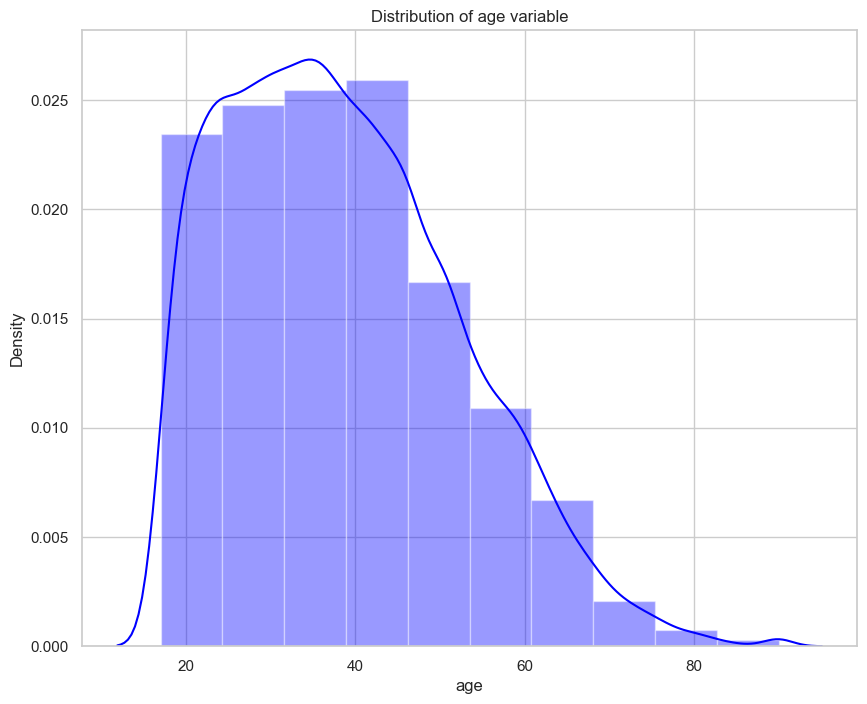

In [38]:
f, ax = plt.subplots(figsize = (10,8))
x = df['age']
ax = sns.distplot(x, bins = 10,color = 'blue')
ax.set_title("Distribution of age variable")
plt.show()

- we can see that age is slightly positively skewed

### Detect outliers in age variable with boxplot

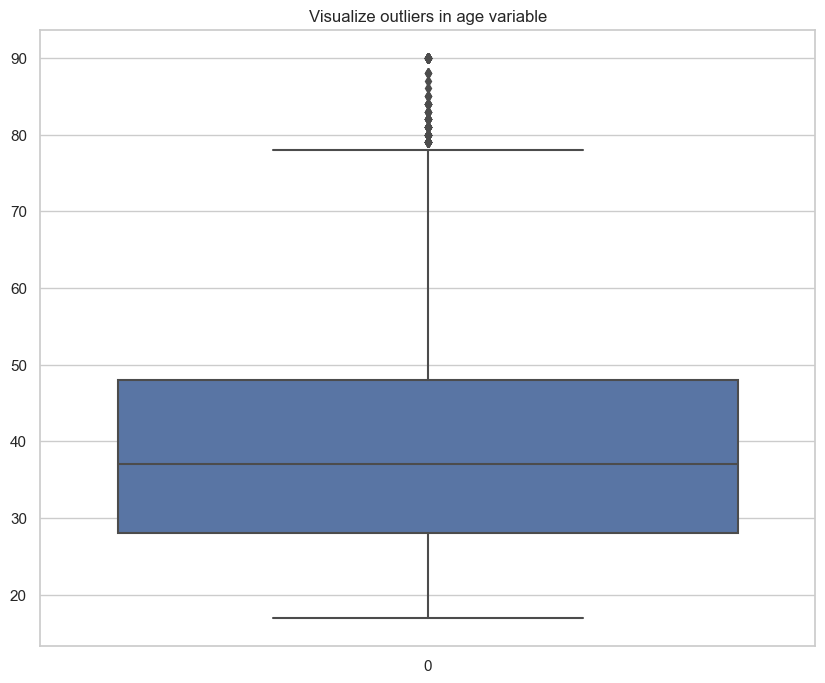

In [39]:
f,ax =plt.subplots(figsize = (10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

- we can see that there are lots of ouyliers in the age variable

#### Explore relationship between age and income variables

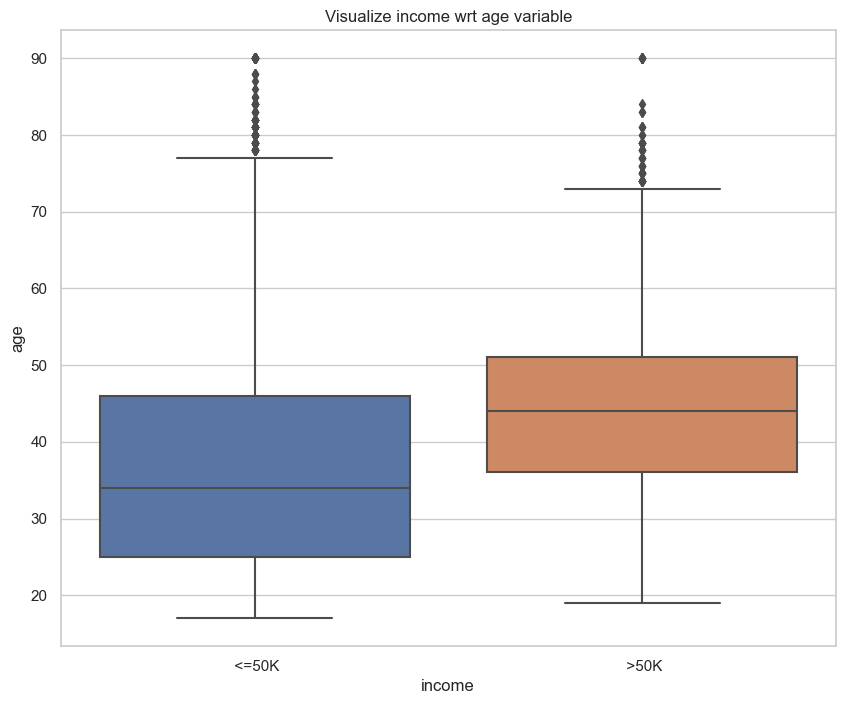

In [40]:
f,ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(x ='income', y= 'age', data = df)
ax.set_title("Visualize income wrt age variable")
plt.show()

- As expected, younger people make less money as compared to senior peple.

#### visualize income wrt age and sex variable

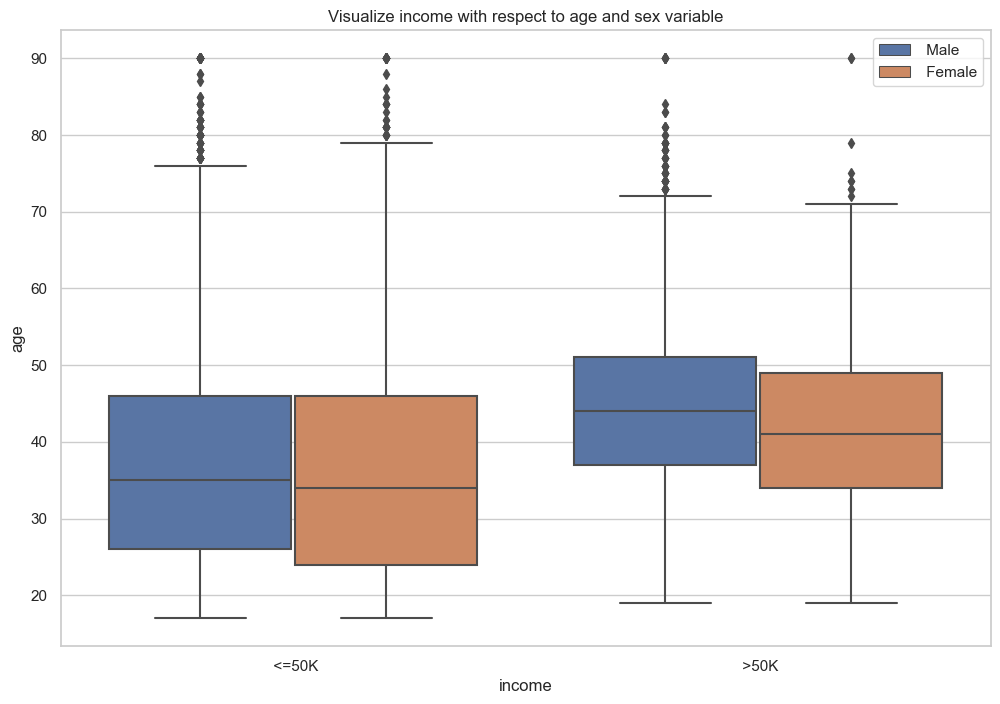

In [41]:
f, ax = plt.subplots(figsize =(12,8))
ax = sns.boxplot(data = df, x = 'income',y= 'age',hue = 'sex')
ax.set_title("Visualize income with respect to age and sex variable")
ax.legend(loc ='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

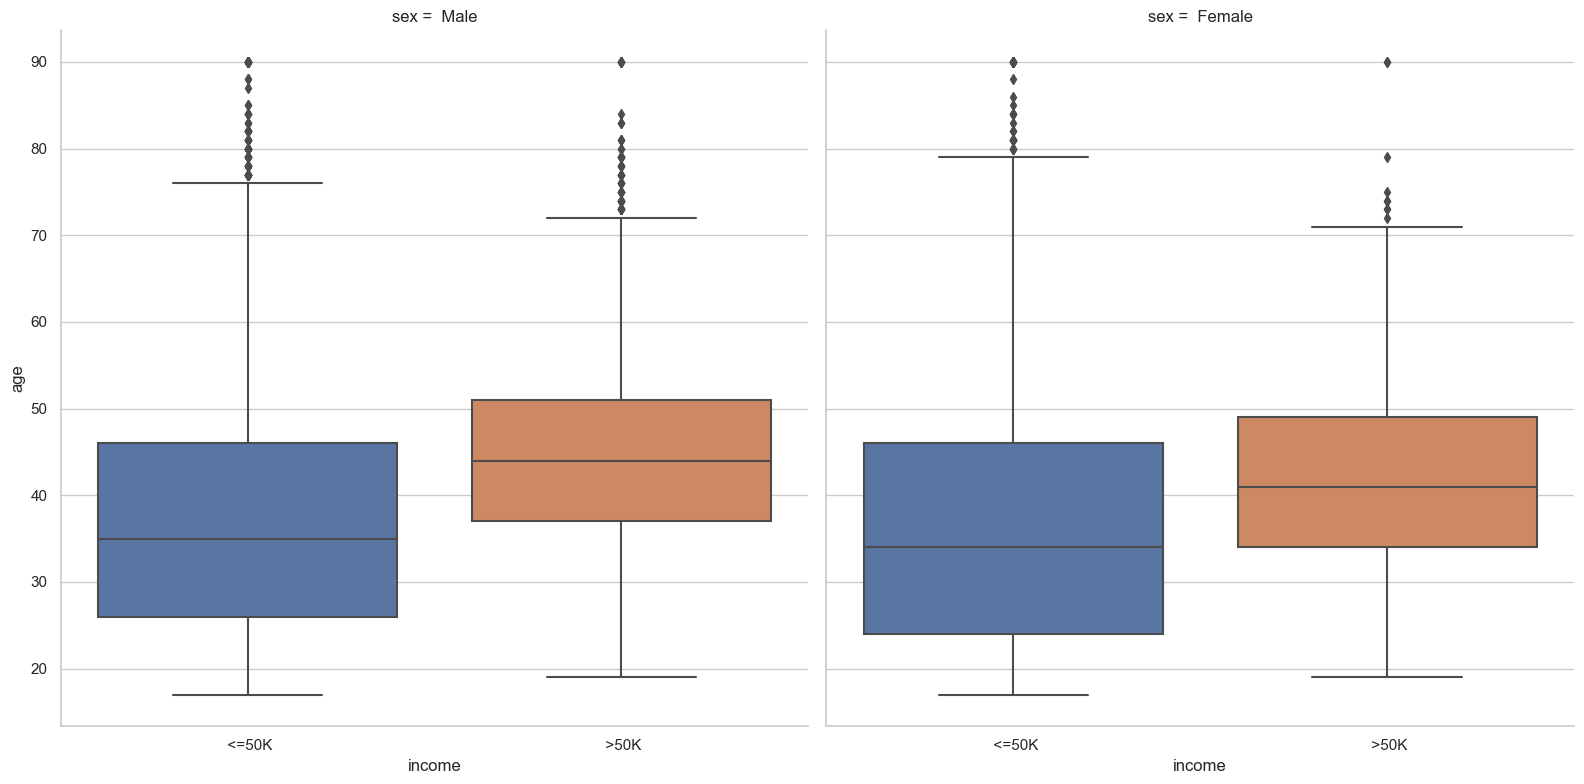

In [42]:
plt.figure(figsize = (10,6))
ax =sns.catplot(x ='income',y= 'age', col ='sex',data = df, kind = 'box', height = 8,aspect = 1)
plt.show()

- Senior people make moremoney than younger people

### Visualize relationship between race and age

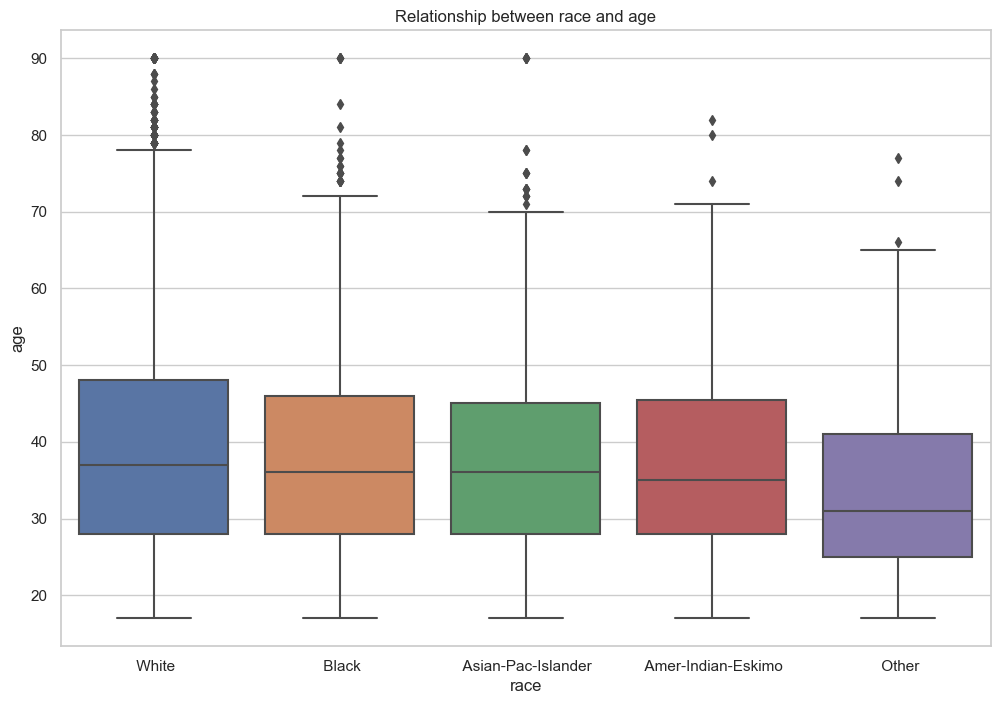

In [43]:
f,ax = plt.subplots(figsize = (12,8))
ax = sns.boxplot(x = 'race', y = 'age',data = df)
ax.set_title("Relationship between race and age")
plt.show()

- whites are more older than other group of people

### Find out the correlation

In [44]:
# plot correlation heatmap to find out correlation
df.corr().style.format("{:.4}").background_gradient(cmap = plt.get_cmap('coolwarm'), axis = 1)

- We can see that there is no strong correlation between variables

#### plot pairwise relationship in dataset

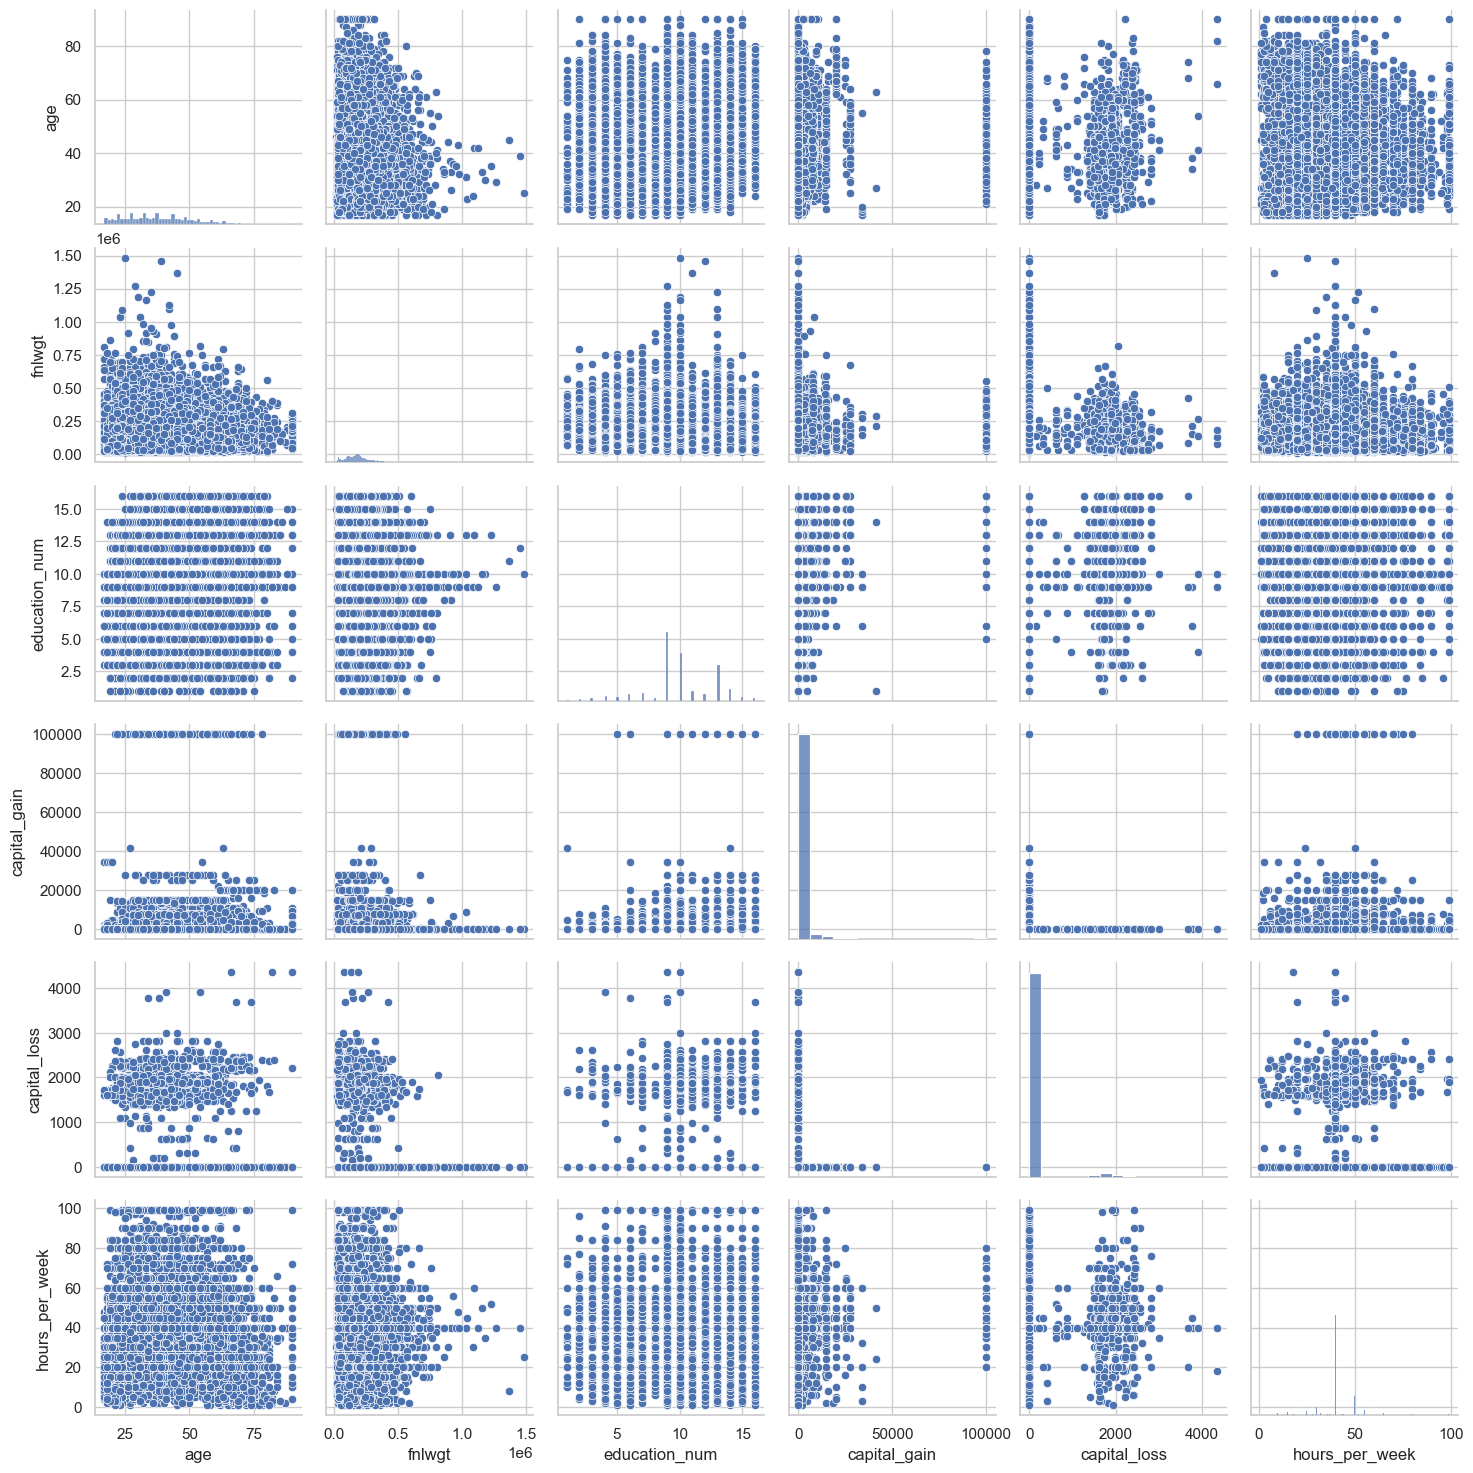

In [45]:
sns.pairplot(df)
plt.show()

- We can see that age and fnlwgt are positively skewed
- The variable education_num is negatively skewed while hours_per_week is normally distributed
- There exists weak positive correlation between capital_gain and education_num (correlation coefficient=0.1226).

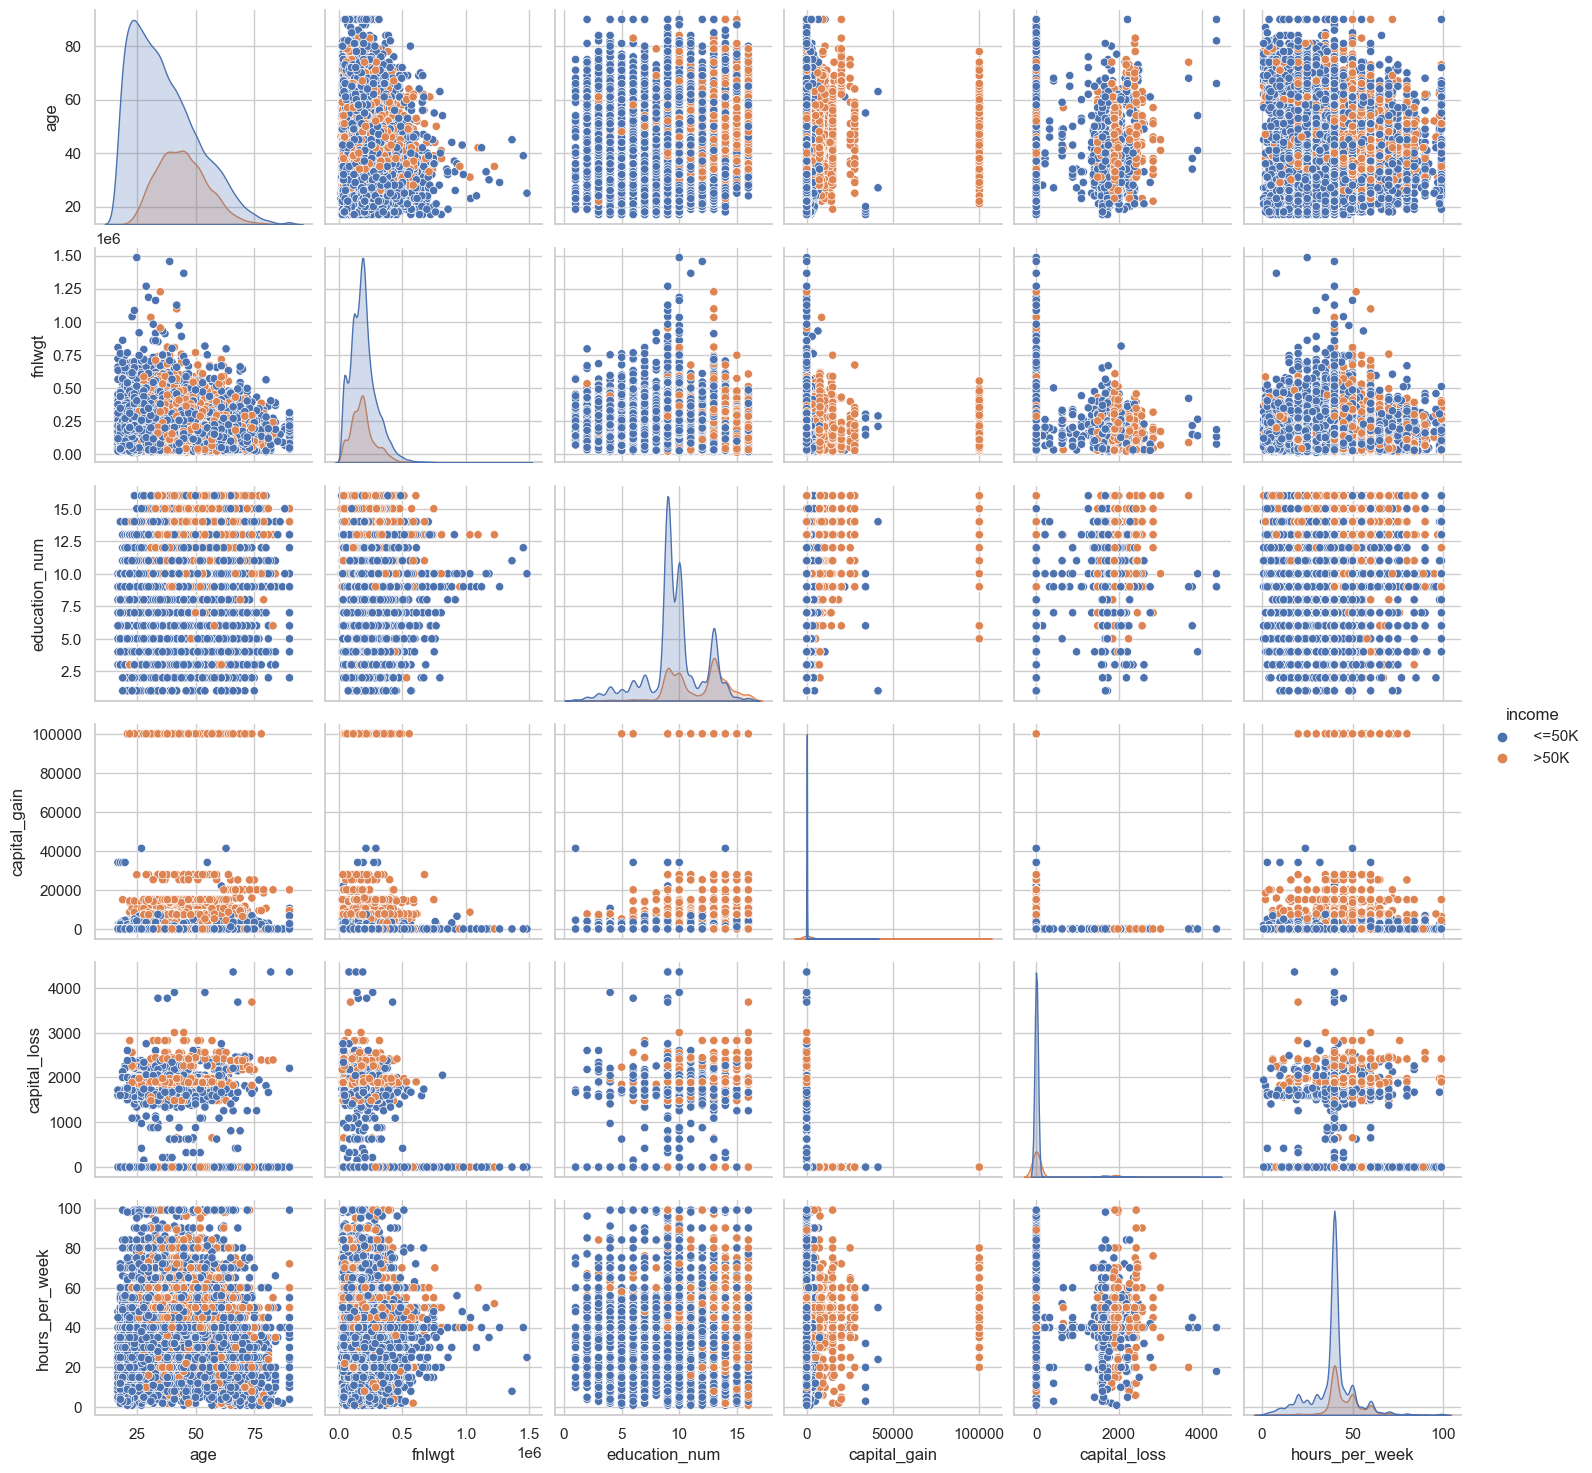

In [46]:
sns.pairplot(df, hue ='income')
plt.show()

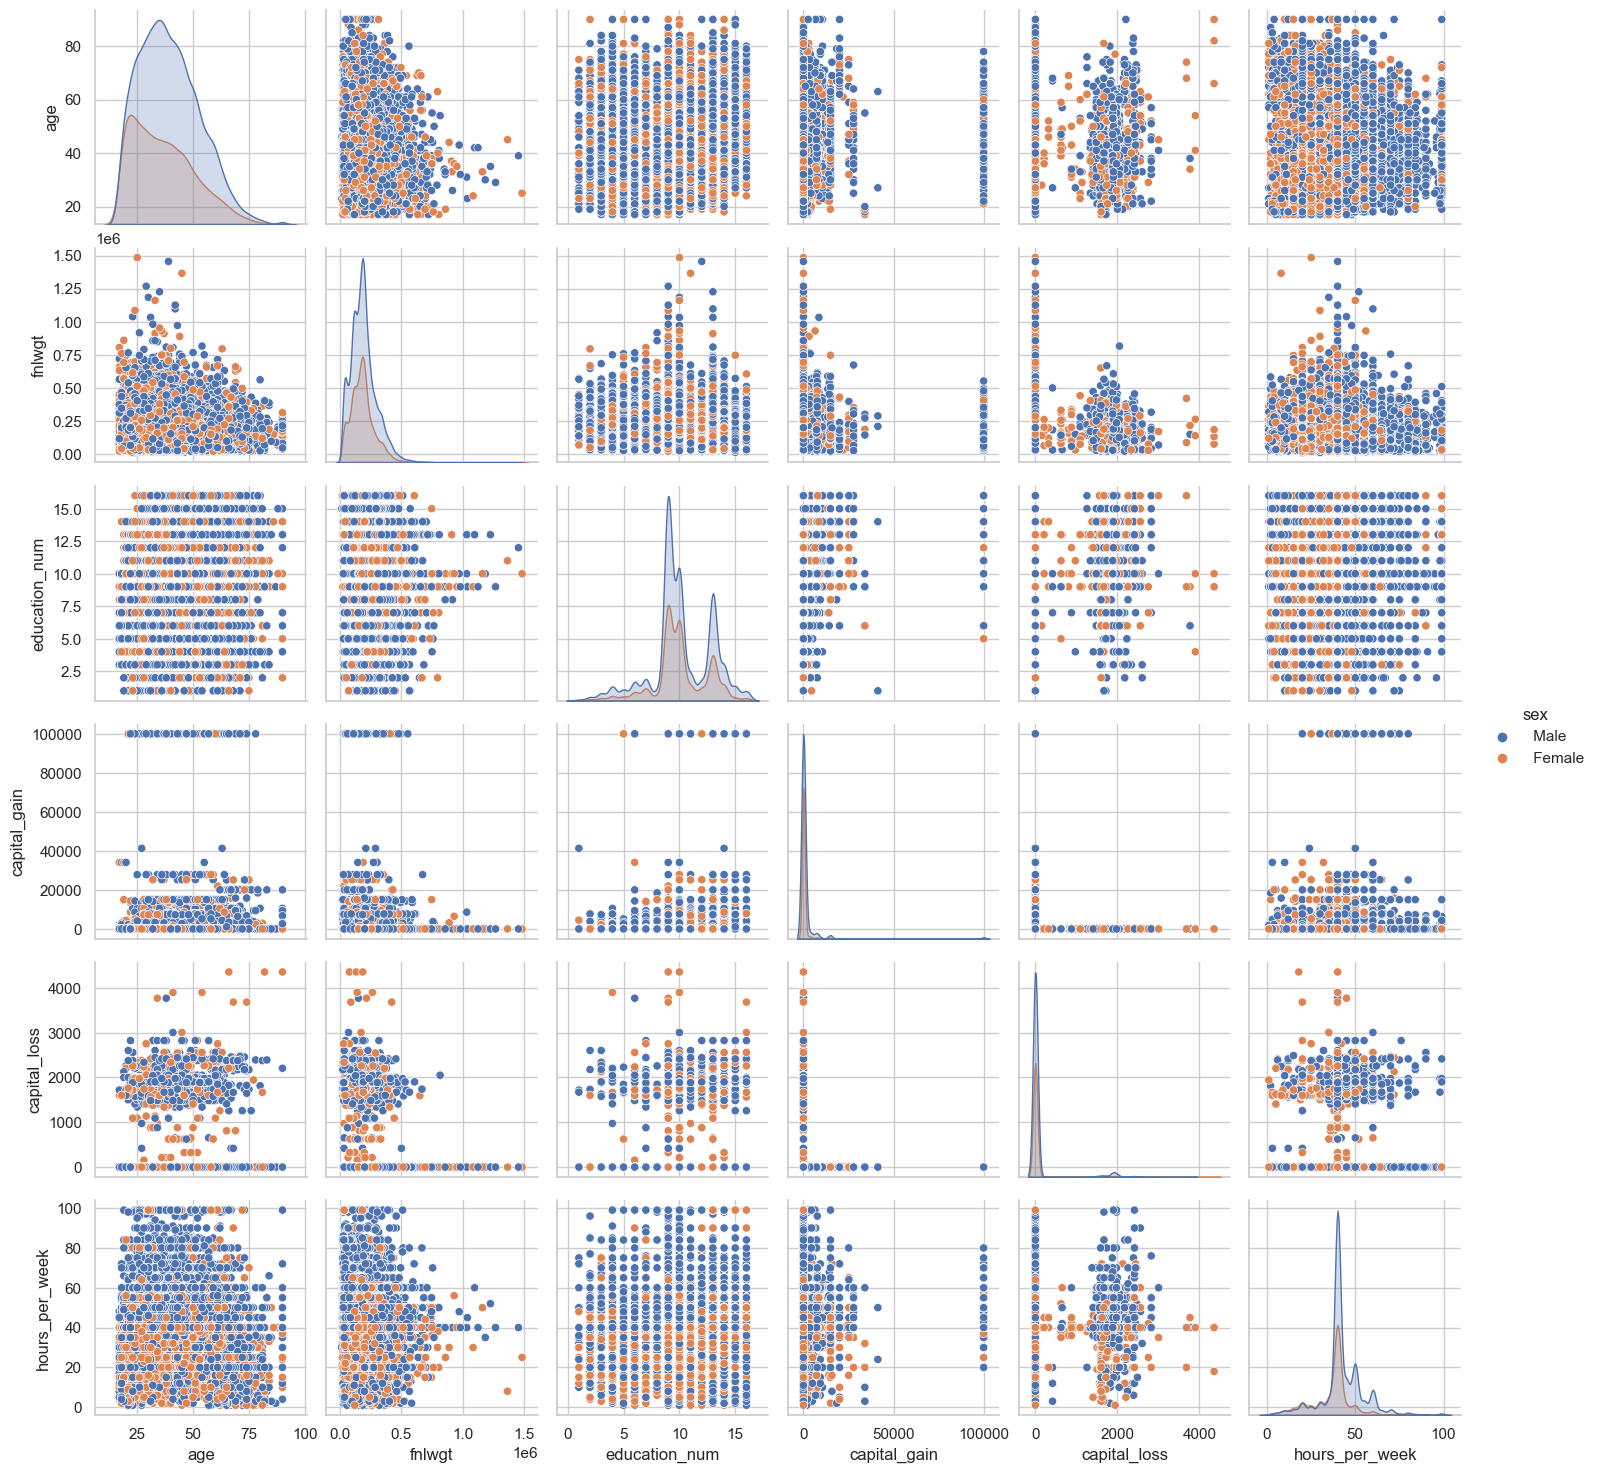

In [47]:
sns.pairplot(df, hue = 'sex')
plt.show()

## Declare feature vector and target variable

In [48]:
X = df.drop(columns = 'income', axis =1)
y = df['income']

## Split data into training and testing set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.3 )
print(f"The shape of X_train : {X_train.shape}")
print(f"The shape of X_test  : {X_test.shape}")
print(f"The shape of y_train : {y_train.shape}")
print(f"The shape of y_test  : {y_test.shape}")


The shape of X_train : (22792, 14)
The shape of X_test  : (9769, 14)
The shape of y_train : (22792,)
The shape of y_test  : (9769,)


### Feature Engineering

- Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

### Display categorical variable in traning set

In [50]:
categorical =[var for var in X_train.columns if df[var].dtype == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### Display numerical variables in training set

In [51]:
numerical = [col for col in X_train.columns if df[col].dtype !='O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variable

In [52]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean() *100

workclass         5.598456
education         0.000000
marital_status    0.000000
occupation        5.607231
relationship      0.000000
race              0.000000
sex               0.000000
native_country    1.816427
dtype: float64

In [53]:
for col in categorical :
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [54]:
for dataframe in [X_train, X_test] :
    dataframe['workclass'].fillna(X_train['workclass'].mode()[0], inplace = True)
    dataframe['occupation'].fillna(X_train['occupation'].mode()[0], inplace = True)
    dataframe['native_country'].fillna(X_train['native_country'].mode()[0], inplace = True)
    

In [55]:
print(X_train.isnull().sum())
print("\n",X_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [56]:
# preview categorical variables in X_train
X_train[categorical].head()

workclass      education       marital_status     occupation  \
32098     Private        HS-grad   Married-civ-spouse   Craft-repair   
25206   State-gov        HS-grad             Divorced   Adm-clerical   
23491     Private   Some-college   Married-civ-spouse          Sales   
12367     Private        HS-grad        Never-married   Craft-repair   
7054      Private        7th-8th        Never-married   Craft-repair   

         relationship    race      sex  native_country  
32098         Husband   White     Male   United-States  
25206       Unmarried   White   Female   United-States  
23491         Husband   White     Male   United-States  
12367   Not-in-family   White     Male       Guatemala  
7054    Not-in-family   White     Male         Germany

In [57]:
# import category encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
# Column Transformer
ct = ColumnTransformer(transformers = [
    ('OneHotEncoder', OneHotEncoder(sparse= False, drop = None), categorical)
], remainder= 'passthrough')

# OneHotEncoder
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


# Converting backtothe dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [59]:
# List of features after OneHotEncoder
names = ct.get_feature_names_out().tolist()

# New Column names
column_names_after_ohe= []
for name in names :
    column_names_after_ohe.append(str(name).split('_', maxsplit= 1)[1])

In [60]:
X_train.columns = column_names_after_ohe
X_test.columns =column_names_after_ohe

In [61]:
print(X_train.shape,X_test.shape)

(22792, 105) (9769, 105)


### Feature Scaling

In [63]:
#columns
cols = X_train.columns

In [64]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns= cols)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns= cols)



### Random Forest Classifier With Default Parameter


In [69]:
# import randomforest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10,random_state= 0)


# fit the model
rfc.fit(X_train, y_train)

# predict X_test
y_pred = rfc.predict(X_test)

# check accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(f"accuracy score with 10 decision trees : {accuracy_score(y_test, y_pred)} ")

accuracy score with 10 decision trees : 0.8469648889343843 


### Random Forest Classifier model with 100 Decision Trees

In [68]:
# instantiate the classifier
rfc_100 = RandomForestClassifier(n_estimators=100,random_state= 0)


# fit the model
rfc_100.fit(X_train, y_train)

# predict X_test
y_pred_100 = rfc_100.predict(X_test)

# check accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(f"accuracy score with 10 decision trees : {accuracy_score(y_test, y_pred_100)} ")

accuracy score with 10 decision trees : 0.8525949431876344 


In [70]:
### Find Important Features with Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state= 0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
# view the feature score
feature_scores = pd.Series(clf.feature_importances_,index = X_train.columns).sort_values(ascending= False)
feature_scores

_fnlwgt                                0.159620
_age                                   0.149711
_capital_gain                          0.094908
_hours_per_week                        0.085118
_marital_status_ Married-civ-spouse    0.063899
                                         ...   
_education_ Preschool                  0.000031
_occupation_ Armed-Forces              0.000016
_native_country_ Honduras              0.000011
_workclass_ Never-worked               0.000008
_native_country_ Holand-Netherlands    0.000000
Length: 105, dtype: float64

- We can see that the most important feature is fnlwgt and least important feature is native_country_41.

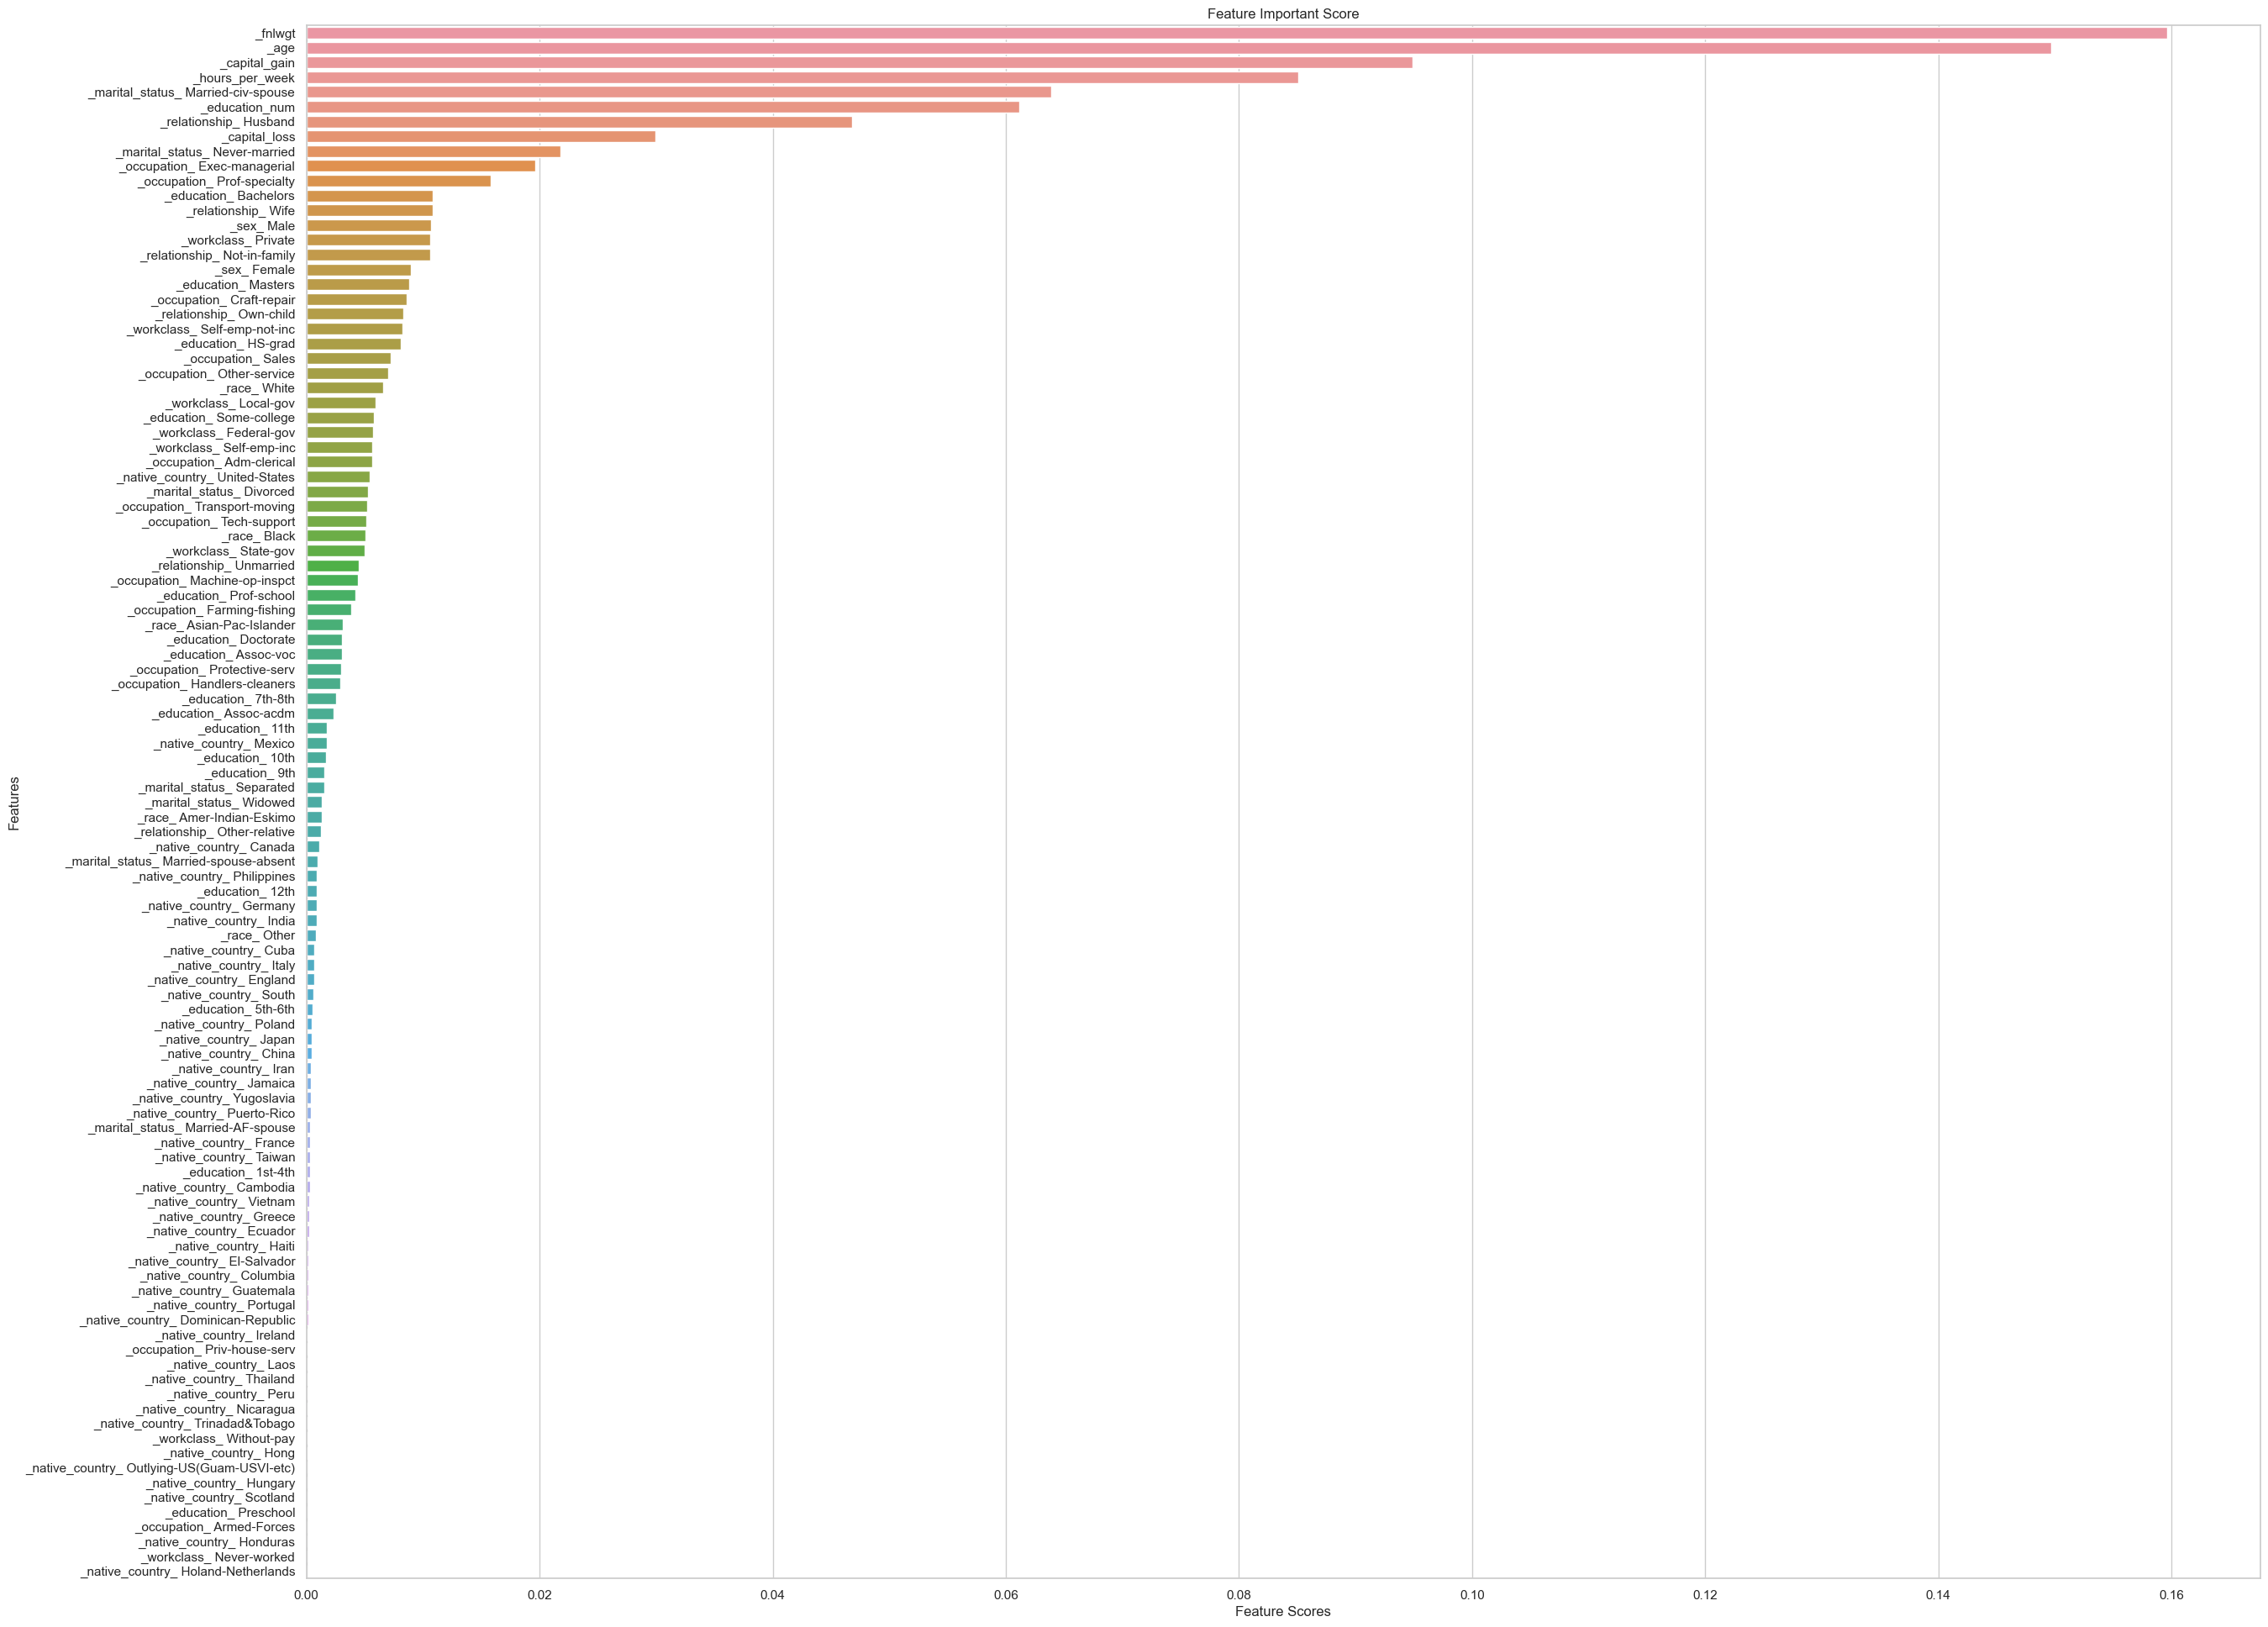

In [76]:
# Visualize feature score of each feature
f, ax = plt.subplots(figsize = (30,24))
ax = sns.barplot(x = feature_scores, y =feature_scores.index)
ax.set_title("Feature Important Score")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel('Feature Scores')
ax.set_ylabel('Features')
plt.show()

- The above plot confirms that the most important feature is fnlwgt and least important feature is '_native_country_ Holand-Netherlands'.

### Build The RandomForest Model on Selected Features


In [77]:
# Remove least import feature from the data {'_native_country_ Holand-Netherlands'}

X_train = X_train.drop(columns = ['_native_country_ Holand-Netherlands'])

X_test = X_test.drop(columns = ['_native_country_ Holand-Netherlands'])

In [124]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with _native_country_ Holand-Netherlands variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with _native_country_ Holand-Netherlands variable removed : 0.8533


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [125]:
# print the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)

print("Confusion matrix: \n\n", cm)

Confusion matrix: 

 [[6860  547]
 [ 886 1476]]


In [153]:
print("actual <=50k : ", {yt.value_counts()[0]})
print("actual >50k : ", {yt.value_counts()[1]})

print()
print("pred <=50k : ", {yp.value_counts()[0]})
print("pred >50k : ", {yp.value_counts()[1]})

test_pred = pd.concat([yt,yp],axis =1)
test_pred.columns =['actual','preds']
test_pred

actual <=50k :  {7407}
actual >50k :  {2362}

pred <=50k :  {7746}
pred >50k :  {2023}


actual   preds
0      <=50K   <=50K
1      <=50K   <=50K
2      <=50K   <=50K
3      <=50K   <=50K
4       >50K   <=50K
...      ...     ...
9764    >50K    >50K
9765    >50K    >50K
9766    >50K    >50K
9767   <=50K   <=50K
9768   <=50K   <=50K

[9769 rows x 2 columns]

In [156]:
print(pd.crosstab(test_pred['actual'],test_pred['preds']))

print(cm)


preds    <=50K   >50K
actual               
 <=50K    6860    547
 >50K      886   1476
[[6860  547]
 [ 886 1476]]


<Axes: >

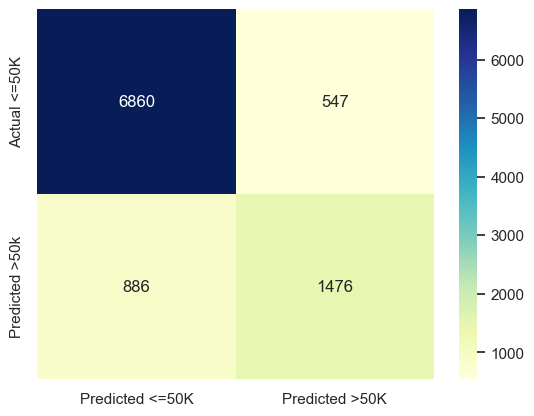

In [167]:
# Visualize the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns = ['Predicted <=50K','Predicted >50K'],
            index = ['Actual <=50K', 'Predicted >50k'])
sns.heatmap(cm_matrix, annot = True,  cmap='YlGnBu', fmt = 'd' )

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



 <=50K    7407
 >50K     2362
Name: income, dtype: int64

0

In [114]:
for i, j in zip(yt, yp):
    print(i,j)

 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  >50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  >50K
 <=50K  >50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  >50K
 >50K  <=50K
 <=50K  <=50K
 <=50K  >50K
 >50K  >50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  >50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  >50K
 >50K  <=50K
 >50K  >50K
 >50K  >50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  >50K
 <=50K  <=50K
 <=50K  >50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  <=50K
 >50K  <=50K
 <=50K  <=50K
 <=50K  <=50K
 <=50K  >50K
 >50K  >50K
 <=50K  <